In [16]:
# import neccesary libraries 
import mne 
import matplotlib.pyplot as plt 
from scipy import signal 

Read the raw edf signal 

In [17]:
raw_signal = mne.io.read_raw_edf("data/SC4002E0-PSG.edf", preload=True)

Extracting EDF parameters from /home/anirudh/Documents/Sem6/BioSignalProcessing/Project/Automatic-Sleep-Phase-Detection-/data/SC4002E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8489999  =      0.000 ... 84899.990 secs...


Observing information from the signal 

In [18]:
raw_signal.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 1989-04-25 14:50:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
>

#### Observations 
- We can observe that there are 7 good channels of EEG , and that the sampling frequency is 100 HZ for this data 
- With the Lowest Frequency being .50 Hz and highest being 100 Hz

#### Further 
- Let us observe the channel names 

In [19]:
channel_names = raw_signal.info['ch_names']
print(channel_names)

['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']


#### Next Step 
Let us look at all the data together , by plotting them out 

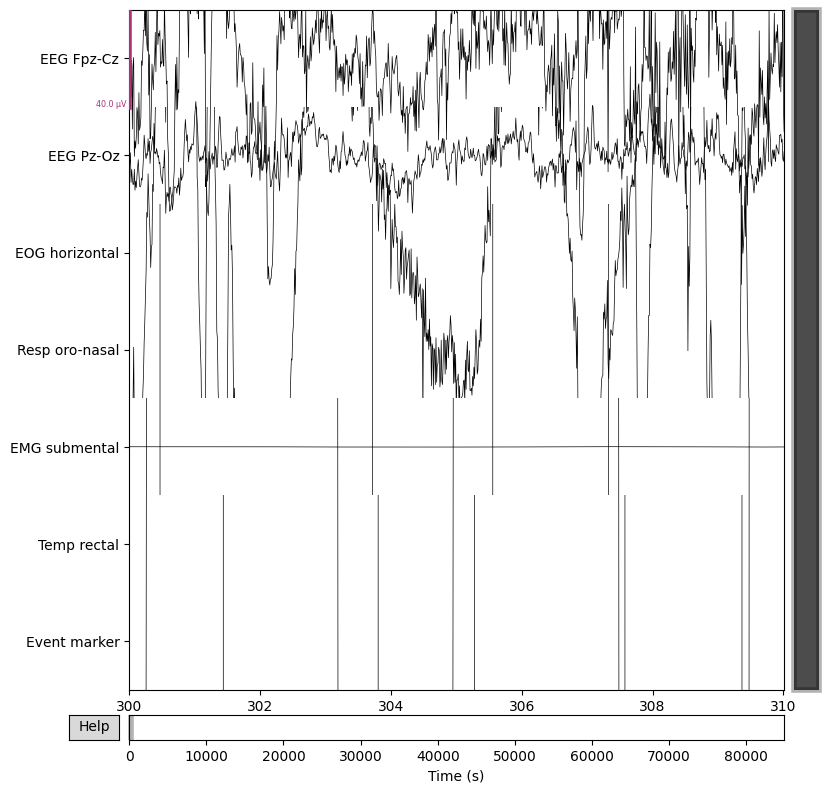

In [20]:
# Plotting the raw EEG signal
raw_signal.plot(start=300,duration=10, block=True, show=False, color='black')

#### Observations 
- Currently I am not able to draw many observations from the data looking at the them together
- So let us look at them channel by channel , and see if it can give us ideas on how to preprocess it 

Let us look at the EEG of FPZ-cz

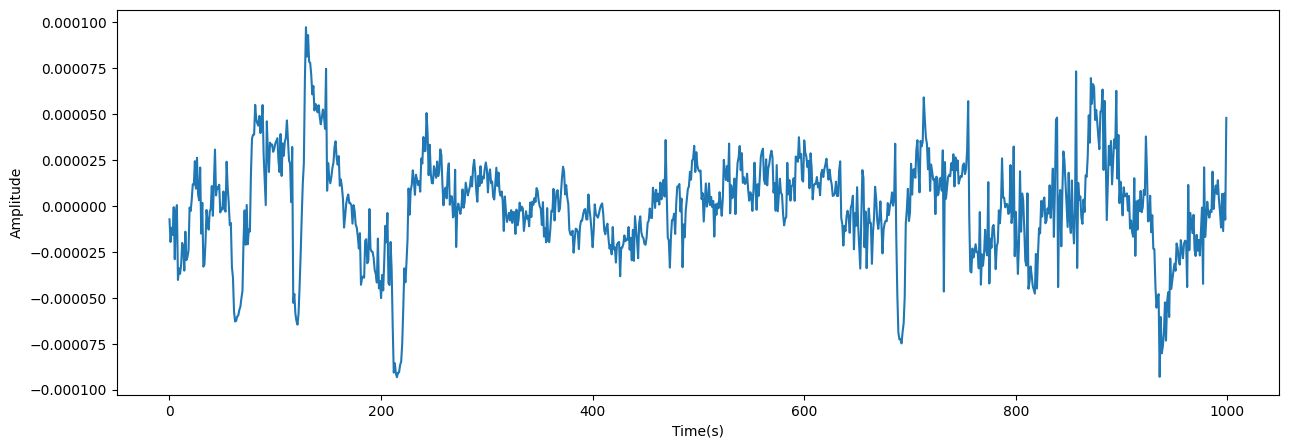

In [22]:
# defining some plotting specifics 
fig, ax = plt.subplots(figsize=[15, 5])

# some reference 
start_time = 300
end_time = 310

# obtaining data 
data_ch1 = raw_signal.get_data(picks='EEG Fpz-Cz', tmin=start_time, tmax=end_time).T
ax.plot(data_ch1)
ax.set_xlabel("Time(s)")
ax.set_ylabel("Amplitude")
plt.show()

#### Observations
- For this 10 second period , I notice that there is a lot of high frequency noise 
- The units , of left are in Volts , so we have to keep in mind to them to microVolts 
- Most of the period seems to have high amplitude 

#### Further 
- Let us see if we can compute the PSD of the same 

In [28]:
# Relook this 
f, Pxx = signal.welch(data_ch1, fs=100.0, nperseg=1)
"""
plt.semilogy(f, Pxx)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()
"""

"\nplt.semilogy(f, Pxx)\nplt.xlabel('frequency [Hz]')\nplt.ylabel('PSD [V**2/Hz]')\nplt.show()\n"